In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', 120)


In [4]:
df = pd.read_csv("../Data/ro_issues_clean.csv")
df.head()


,id,week,ro_number,tech_initials,category,action_taken,operation_group,build_type,date_reviewed,labor_hours_billed,labor_hours_correct,parts_cost,total_estimated_cost,high_cost_flag,notes,labor_rate,labor_cost_billed,labor_cost_correct,cost_overcharge,issue_severity,action_quality,severity_score,op_risk_bucket
0,1,5,2343334,DF,Unnecessary Repair,No Action,Steering,Production,2/2/2025,2.2,0.4,221.68,419.68,No,Unnecessary Repair on Steering work; review la...,90,198,36,162,High,Unaddressed,3,Low-Risk
1,2,2,2343153,RL,Unnecessary Repair,No Action,Maintenance,Production,1/12/2025,2.9,1.1,63.04,324.04,No,Added separate labor to remove under shield in...,90,261,99,162,High,Unaddressed,3,Low-Risk
2,3,4,2343266,KG,High Cost Repair,Adjusted Labor,Suspension,Production,1/23/2025,4.3,2.5,339.02,726.02,Yes,High Cost Repair on Suspension work; review la...,90,387,225,162,High,Corrected,3,Low-Risk
3,4,5,2343305,CM,Incorrect Labor Time,Declined,Electrical,Retail,1/29/2025,3.7,1.9,448.49,781.49,Yes,Full R&R door panel labor used instead of R&I ...,90,333,171,162,High,Corrected,3,High-Risk
4,5,7,2343469,JD,Incorrect Labor Time,Adjusted Labor,Brakes,Production,2/14/2025,4.0,2.3,254.31,614.31,No,Used full R&R rotor and pad labor instead of c...,90,360,207,153,High,Corrected,3,High-Risk


In [5]:
df.shape


(201, 23)

In [6]:
df.columns.tolist()


['id',
 'week',
 'ro_number',
 'tech_initials',
 'category',
 'action_taken',
 'operation_group',
 'build_type',
 'date_reviewed',
 'labor_hours_billed',
 'labor_hours_correct',
 'parts_cost',
 'total_estimated_cost',
 'high_cost_flag',
 'notes',
 'labor_rate',
 'labor_cost_billed',
 'labor_cost_correct',
 'cost_overcharge',
 'issue_severity',
 'action_quality',
 'severity_score',
 'op_risk_bucket']

In [7]:
df.dtypes


id                        int64
week                      int64
ro_number                 int64
tech_initials            object
category                 object
action_taken             object
operation_group          object
build_type               object
date_reviewed            object
labor_hours_billed      float64
labor_hours_correct     float64
parts_cost              float64
total_estimated_cost    float64
high_cost_flag           object
notes                    object
labor_rate                int64
labor_cost_billed         int64
labor_cost_correct        int64
cost_overcharge           int64
issue_severity           object
action_quality           object
severity_score            int64
op_risk_bucket           object
dtype: object

In [8]:
df.describe()


,id,week,ro_number,labor_hours_billed,labor_hours_correct,parts_cost,total_estimated_cost,labor_rate,labor_cost_billed,labor_cost_correct,cost_overcharge,severity_score
count,201.000000,201.000000,2.010000e+02,201.000000,201.000000,201.000000,201.000000,201.0,201.000000,201.000000,201.000000,201.000000
mean,101.000000,4.527363,2.343294e+06,2.360697,1.601493,216.986468,429.449154,90.0,212.462687,144.134328,68.328358,1.532338
std,58.167861,2.336771,1.720528e+02,1.258053,1.177305,130.184310,167.432318,0.0,113.224776,105.957477,45.494743,0.836779
min,1.000000,1.000000,2.343001e+06,0.300000,0.300000,2.480000,55.420000,90.0,27.000000,27.000000,0.000000,0.000000
25%,51.000000,2.000000,2.343148e+06,1.200000,0.300000,97.120000,322.120000,90.0,108.000000,27.000000,36.000000,1.000000
50%,101.000000,5.000000,2.343294e+06,2.400000,1.400000,223.760000,432.010000,90.0,216.000000,126.000000,63.000000,1.000000
75%,151.000000,7.000000,2.343446e+06,3.500000,2.500000,329.400000,534.420000,90.0,315.000000,225.000000,99.000000,2.000000
max,201.000000,8.000000,2.343590e+06,4.500000,4.400000,448.590000,818.770000,90.0,405.000000,396.000000,162.000000,3.000000


In [9]:
df.isnull().sum()


id                      0
week                    0
ro_number               0
tech_initials           0
category                0
action_taken            0
operation_group         0
build_type              0
date_reviewed           0
labor_hours_billed      0
labor_hours_correct     0
parts_cost              0
total_estimated_cost    0
high_cost_flag          0
notes                   0
labor_rate              0
labor_cost_billed       0
labor_cost_correct      0
cost_overcharge         0
issue_severity          9
action_quality          0
severity_score          0
op_risk_bucket          0
dtype: int64

In [10]:
df['category'].unique()
df['action_taken'].unique()
df['tech_initials'].unique()
df['operation_group'].unique()
df['issue_severity'].unique()


array(['High', 'Medium', 'Low', nan], dtype=object)

In [11]:
df.columns


Index(['id', 'week', 'ro_number', 'tech_initials', 'category', 'action_taken', 'operation_group', 'build_type',
       'date_reviewed', 'labor_hours_billed', 'labor_hours_correct', 'parts_cost', 'total_estimated_cost',
       'high_cost_flag', 'notes', 'labor_rate', 'labor_cost_billed', 'labor_cost_correct', 'cost_overcharge',
       'issue_severity', 'action_quality', 'severity_score', 'op_risk_bucket'],
      dtype='object')

In [12]:
df['category'].unique()
df['action_taken'].unique()
df['tech_initials'].unique()
df['operation_group'].unique()
df['issue_severity'].unique()


array(['High', 'Medium', 'Low', nan], dtype=object)

In [13]:
df['issue_severity'] = df['issue_severity'].fillna('Low')
df['issue_severity'].unique()


array(['High', 'Medium', 'Low'], dtype=object)

In [14]:
df['cost_overcharge'].sum(),



(np.int64(13734),)

In [15]:
df.groupby('tech_initials')['cost_overcharge'].sum().sort_values(ascending=False)


tech_initials
RL    1161
KG    1053
FF     999
DF     954
CH     801
KM     792
CM     783
AD     684
LP     684
JG     666
TB     648
CS     540
RB     504
AL     486
JD     468
SS     432
RN     396
JC     369
GM     369
SB     306
MM     261
ZT     243
KC     135
Name: cost_overcharge, dtype: int64

In [16]:
df.groupby('week').size()


week
1    28
2    26
3    20
4    22
5    23
6    30
7    29
8    23
dtype: int64

In [17]:
df.describe(include='all')


,id,week,ro_number,tech_initials,category,action_taken,operation_group,build_type,date_reviewed,labor_hours_billed,labor_hours_correct,parts_cost,total_estimated_cost,high_cost_flag,notes,labor_rate,labor_cost_billed,labor_cost_correct,cost_overcharge,issue_severity,action_quality,severity_score,op_risk_bucket
count,201.000000,201.000000,2.010000e+02,201,201,201,201,201,201,201.000000,201.000000,201.000000,201.000000,201,201,201.0,201.000000,201.000000,201.000000,201,201,201.000000,201
unique,NaN,NaN,NaN,23,4,4,12,2,55,NaN,NaN,NaN,NaN,2,73,NaN,NaN,NaN,NaN,3,3,NaN,2
top,NaN,NaN,NaN,RL,Incorrect Labor Time,Adjusted Labor,Electrical,Production,1/9/2025,NaN,NaN,NaN,NaN,No,Overlapping Labor on Electrical work; review l...,NaN,NaN,NaN,NaN,Low,Corrected,NaN,Low-Risk
freq,NaN,NaN,NaN,16,72,86,29,120,7,NaN,NaN,NaN,NaN,155,10,NaN,NaN,NaN,NaN,121,116,NaN,143
mean,101.000000,4.527363,2.343294e+06,NaN,NaN,NaN,NaN,NaN,NaN,2.360697,1.601493,216.986468,429.449154,NaN,NaN,90.0,212.462687,144.134328,68.328358,NaN,NaN,1.532338,NaN
std,58.167861,2.336771,1.720528e+02,NaN,NaN,NaN,NaN,NaN,NaN,1.258053,1.177305,130.184310,167.432318,NaN,NaN,0.0,113.224776,105.957477,45.494743,NaN,NaN,0.836779,NaN
min,1.000000,1.000000,2.343001e+06,NaN,NaN,NaN,NaN,NaN,NaN,0.300000,0.300000,2.480000,55.420000,NaN,NaN,90.0,27.000000,27.000000,0.000000,NaN,NaN,0.000000,NaN
25%,51.000000,2.000000,2.343148e+06,NaN,NaN,NaN,NaN,NaN,NaN,1.200000,0.300000,97.120000,322.120000,NaN,NaN,90.0,108.000000,27.000000,36.000000,NaN,NaN,1.000000,NaN
50%,101.000000,5.000000,2.343294e+06,NaN,NaN,NaN,NaN,NaN,NaN,2.400000,1.400000,223.760000,432.010000,NaN,NaN,90.0,216.000000,126.000000,63.000000,NaN,NaN,1.000000,NaN
75%,151.000000,7.000000,2.343446e+06,NaN,NaN,NaN,NaN,NaN,NaN,3.500000,2.500000,329.400000,534.420000,NaN,NaN,90.0,315.000000,225.000000,99.000000,NaN,NaN,2.000000,NaN


In [18]:
df['cost_overcharge'].sum()



np.int64(13734)

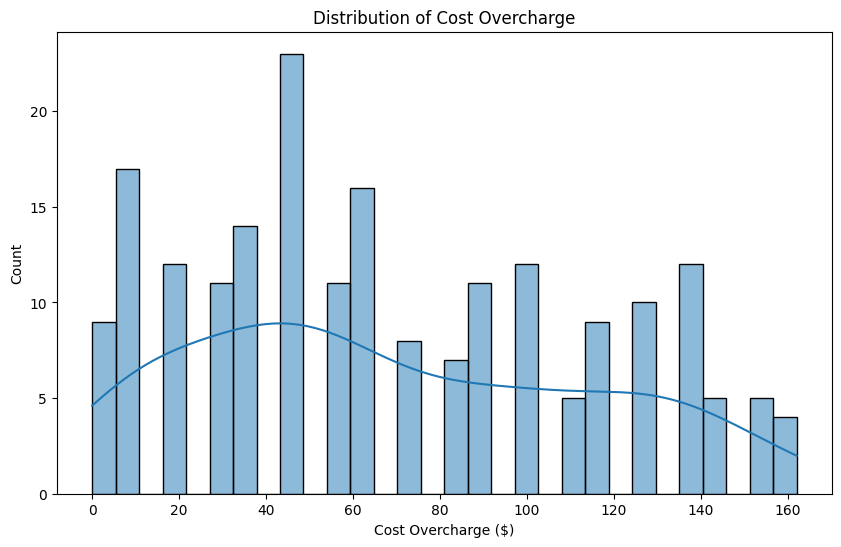

In [19]:
plt.figure(figsize=(10,6))
sns.histplot(df['cost_overcharge'], bins=30, kde=True)
plt.title('Distribution of Cost Overcharge')
plt.xlabel('Cost Overcharge ($)')
plt.show()


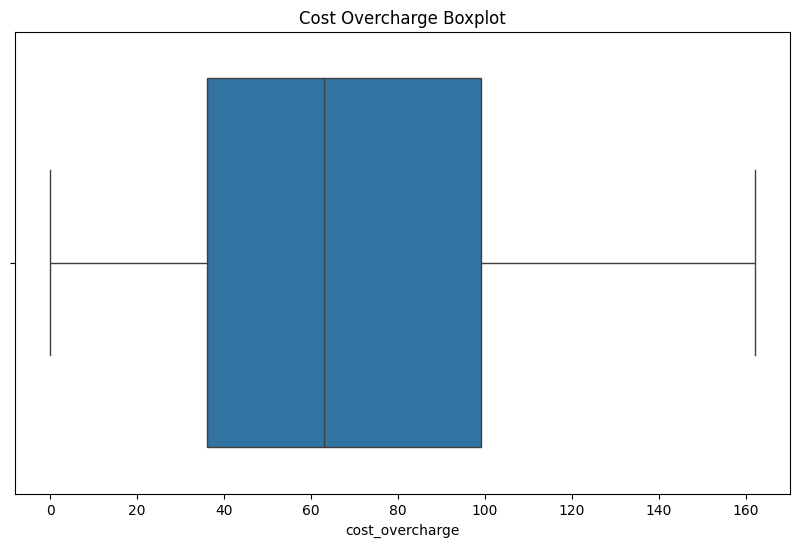

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x=df['cost_overcharge'])
plt.title('Cost Overcharge Boxplot')
plt.show()


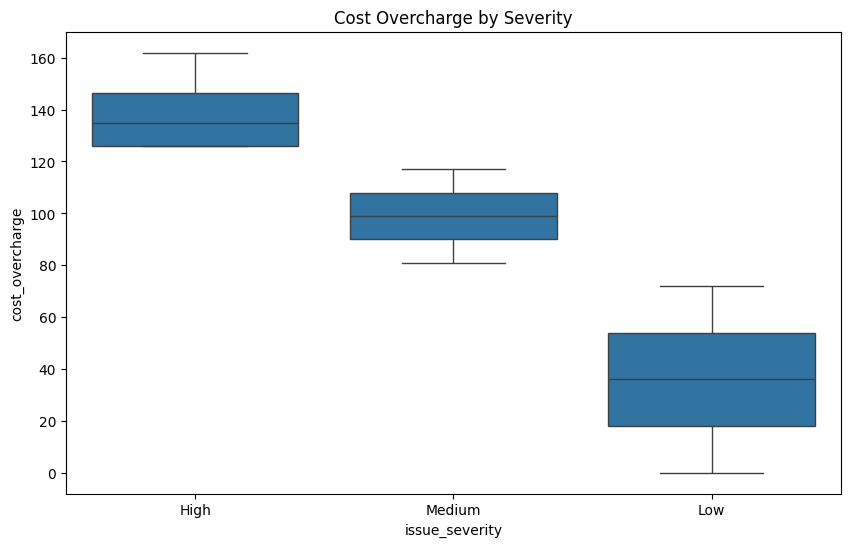

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df, x='issue_severity', y='cost_overcharge')
plt.title('Cost Overcharge by Severity')
plt.show()


In [26]:
df.groupby('tech_initials')['cost_overcharge'].sum().sort_values(ascending=False)


tech_initials
RL    1161
KG    1053
FF     999
DF     954
CH     801
KM     792
CM     783
AD     684
LP     684
JG     666
TB     648
CS     540
RB     504
AL     486
JD     468
SS     432
RN     396
JC     369
GM     369
SB     306
MM     261
ZT     243
KC     135
Name: cost_overcharge, dtype: int64

In [23]:
df['cost_per_hour_over'] = df['cost_overcharge'] / df['labor_hours_correct']


In [24]:
df['cost_per_hour_over'] = df.apply(
    lambda row: np.nan if row['labor_hours_correct'] == 0 else row['cost_overcharge'] / row['labor_hours_correct'],
    axis=1
)


In [25]:
tech_counts = df['tech_initials'].value_counts()
df['tech_incident_count'] = df['tech_initials'].map(tech_counts)


In [27]:
total_cost = df['cost_overcharge'].sum()
tech_cost_share = df.groupby('tech_initials')['cost_overcharge'].sum() / total_cost

df['tech_cost_share'] = df['tech_initials'].map(tech_cost_share)


In [28]:
cat_counts = df['category'].value_counts()
df['category_frequency'] = df['category'].map(cat_counts)


In [29]:
df = pd.get_dummies(df, columns=['category', 'action_taken', 'operation_group'], drop_first=True)


In [31]:
df['tpi'] = (df['severity_score'] * df['cost_overcharge']) / df['tech_incident_count']



In [32]:
df[['tech_initials', 'severity_score', 'cost_overcharge', 'tech_incident_count', 'tpi']].head()


,tech_initials,severity_score,cost_overcharge,tech_incident_count,tpi
0,DF,3,162,12,40.500000
1,RL,3,162,16,30.375000
2,KG,3,162,13,37.384615
3,CM,3,162,10,48.600000
4,JD,3,153,7,65.571429


In [33]:
df[['tech_initials','cost_overcharge','severity_score','tech_incident_count','tpi']].head()


,tech_initials,cost_overcharge,severity_score,tech_incident_count,tpi
0,DF,162,3,12,40.500000
1,RL,162,3,16,30.375000
2,KG,162,3,13,37.384615
3,CM,162,3,10,48.600000
4,JD,153,3,7,65.571429


In [34]:
df.to_csv("../data/ro_issues_enhanced.csv", index=False)


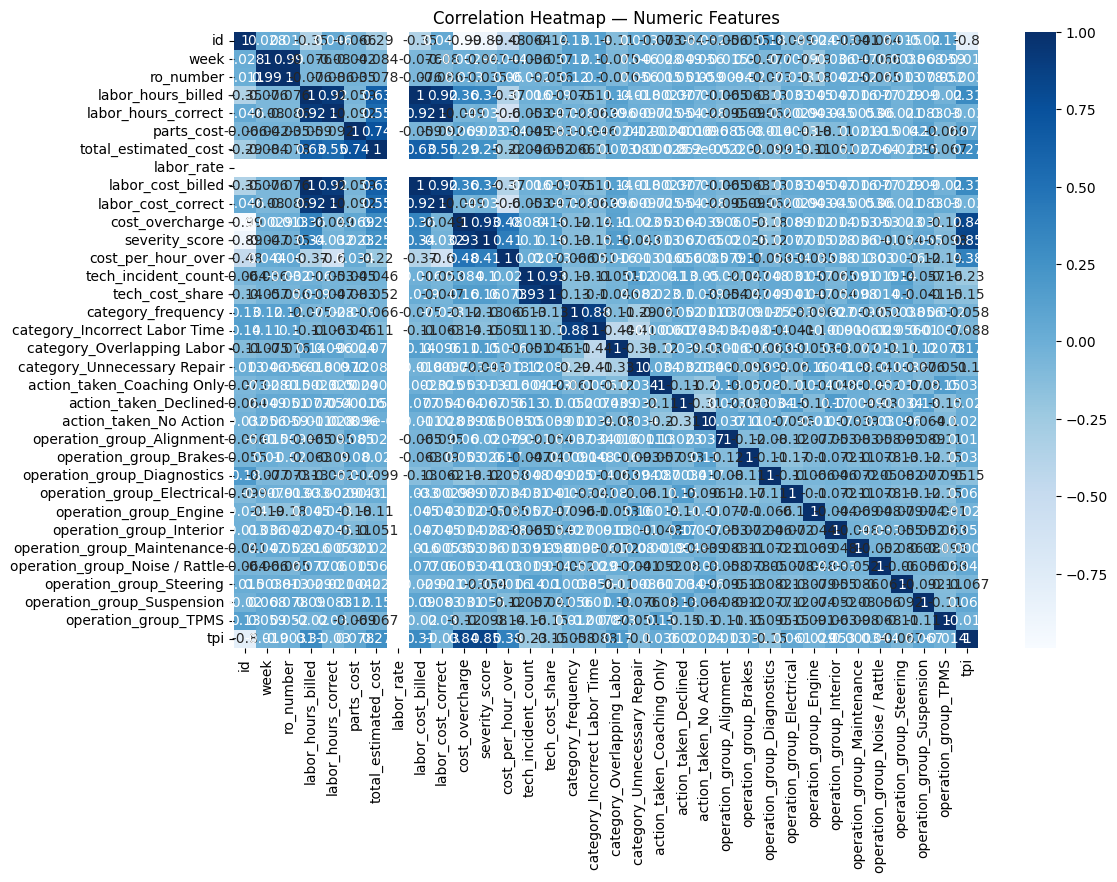

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Heatmap — Numeric Features")
plt.show()


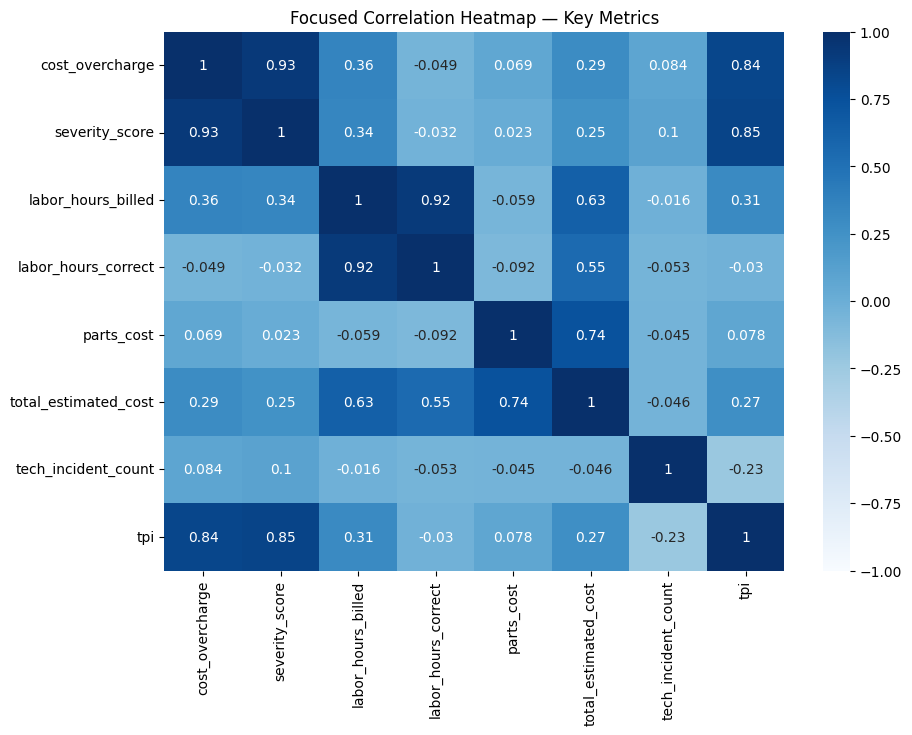

In [40]:
important_cols = [
    'cost_overcharge',
    'severity_score',
    'labor_hours_billed',
    'labor_hours_correct',
    'parts_cost',
    'total_estimated_cost',
    'tech_incident_count',
    'tpi'
]

corr = df[important_cols].corr()

plt.figure(figsize=(10, 7))
sns.heatmap(corr, annot=True, cmap="Blues", vmin=-1, vmax=1)
plt.title("Focused Correlation Heatmap — Key Metrics")
plt.show()


In [41]:
import pandas as pd

df_viz = pd.read_csv("../data/ro_issues_clean.csv")


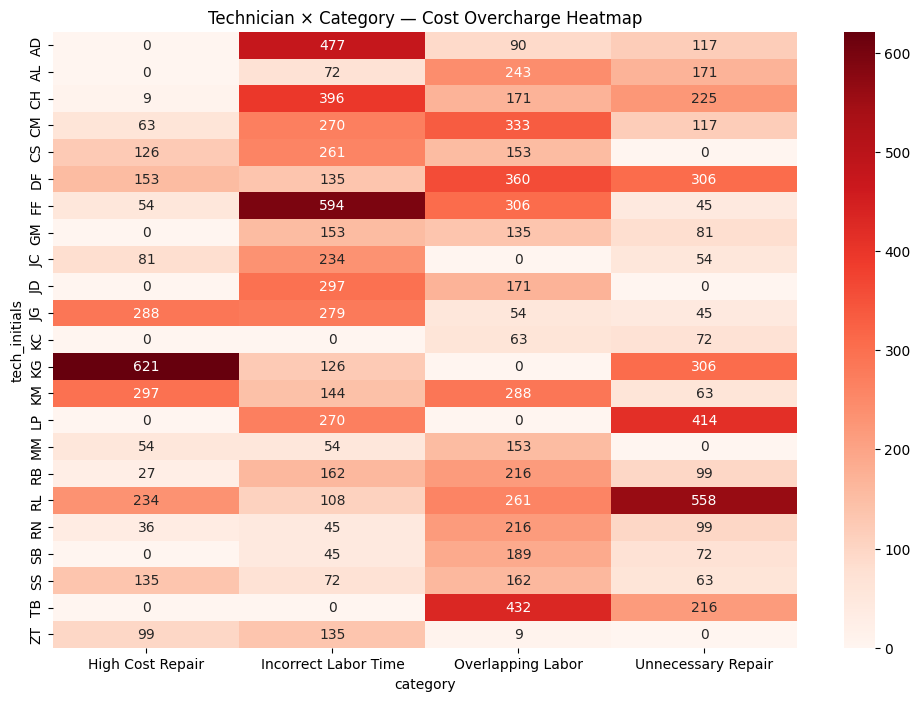

In [42]:
tech_cat_pivot = df_viz.pivot_table(
    index="tech_initials",
    columns="category",
    values="cost_overcharge",
    aggfunc="sum",
    fill_value=0
)

plt.figure(figsize=(12, 8))
sns.heatmap(tech_cat_pivot, cmap="Reds", annot=True, fmt=".0f")
plt.title("Technician × Category — Cost Overcharge Heatmap")
plt.show()


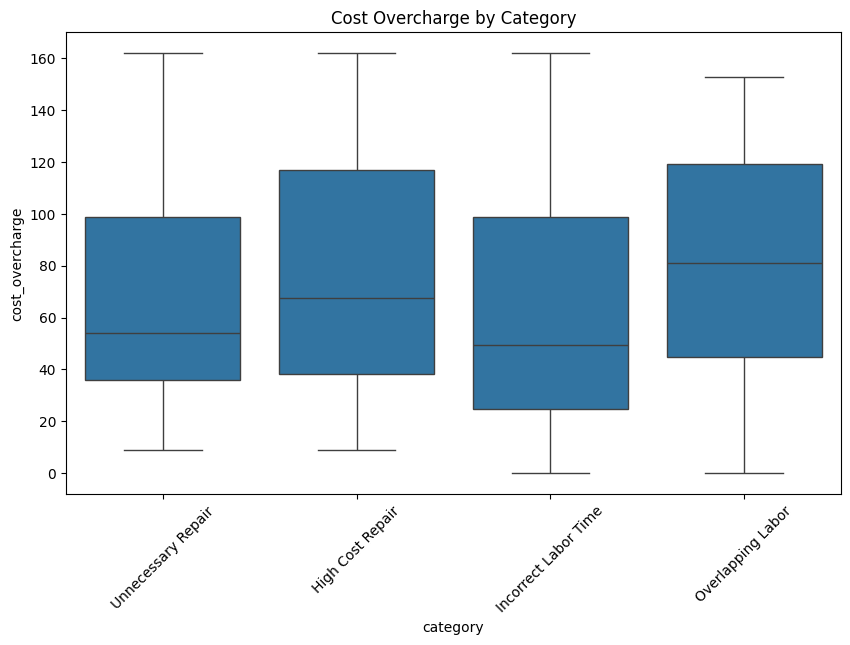

In [43]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_viz, x="category", y="cost_overcharge")
plt.xticks(rotation=45)
plt.title("Cost Overcharge by Category")
plt.show()


In [45]:
from sklearn.cluster import KMeans

cluster_data = df[['cost_overcharge', 'severity_score', 'tech_incident_count']]

kmeans = KMeans(n_clusters=3, random_state=42)
df['tech_cluster'] = kmeans.fit_predict(cluster_data)


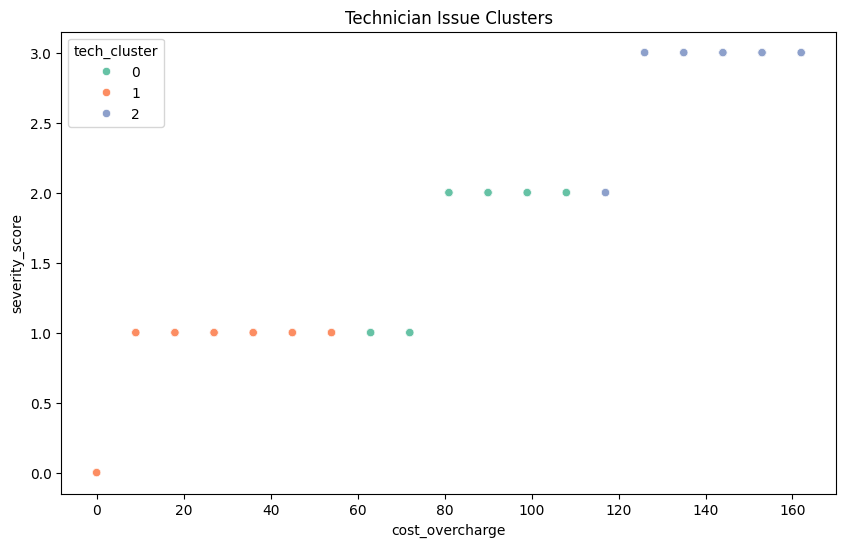

In [46]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=df,
    x="cost_overcharge",
    y="severity_score",
    hue="tech_cluster",
    palette="Set2"
)
plt.title("Technician Issue Clusters")
plt.show()


In [48]:
rl_data = df_viz[df_viz['tech_initials'] == 'RL']

rl_cost_by_cat = rl_data.groupby("category")['cost_overcharge'].sum()

rl_cost_by_cat.sort_values(ascending=False)


category
Unnecessary Repair      558
Overlapping Labor       261
High Cost Repair        234
Incorrect Labor Time    108
Name: cost_overcharge, dtype: int64

In [49]:
shop_avg = df_viz.groupby("category")['cost_overcharge'].mean()

comparison = pd.DataFrame({
    "RL": rl_cost_by_cat,
    "Shop_Avg": shop_avg
}).fillna(0)

comparison


,RL,Shop_Avg
category,,
High Cost Repair,234,75.900000
Incorrect Labor Time,108,60.125000
Overlapping Labor,261,77.019231
Unnecessary Repair,558,66.446809


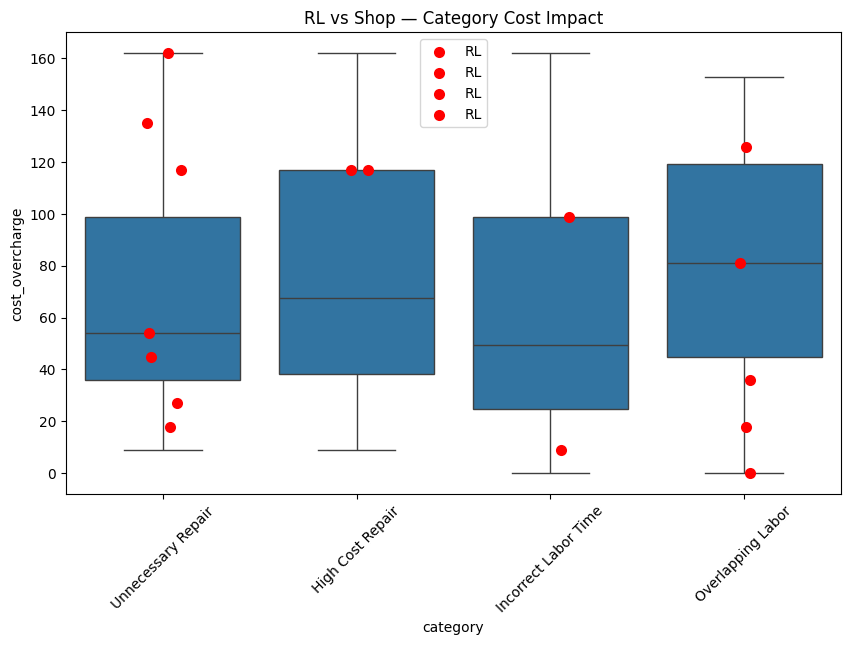

In [50]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_viz, x="category", y="cost_overcharge", showfliers=True)
sns.stripplot(
    data=df_viz[df_viz['tech_initials'] == 'RL'], 
    x="category", 
    y="cost_overcharge", 
    color="red", 
    size=8, 
    label="RL"
)

plt.title("RL vs Shop — Category Cost Impact")
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [53]:
def analyze_tech_category_breakdown(df, tech):
    """
    Returns a table comparing a specific tech's cost_overcharge by category
    against the shop average for each category.
    """
    # Total cost overcharge for this tech per category
    tech_cat = (
        df[df['tech_initials'] == tech]
        .groupby('category')['cost_overcharge']
        .sum()
        .reset_index()
        .rename(columns={'cost_overcharge': f'{tech}_total'})
    )

    # Shop average cost overcharge per category (excluding the tech)
    shop_avg = (
        df[df['tech_initials'] != tech]
        .groupby('category')['cost_overcharge']
        .mean()
        .reset_index()
        .rename(columns={'cost_overcharge': 'shop_avg'})
    )

    # Merge the two tables
    merged = tech_cat.merge(shop_avg, on='category', how='left')

    # Add comparison ratio column
    merged['ratio_tech_to_shop'] = merged[f'{tech}_total'] / merged['shop_avg']

    return merged.sort_values('ratio_tech_to_shop', ascending=False)


In [54]:
analyze_tech_category_breakdown(df_viz, "AD")


,category,AD_total,shop_avg,ratio_tech_to_shop
0,Incorrect Labor Time,477,59.261538,8.049065
2,Unnecessary Repair,117,66.800000,1.751497
1,Overlapping Labor,90,76.764706,1.172414


In [55]:
analyze_tech_category_breakdown(df_viz, "FF")


,category,FF_total,shop_avg,ratio_tech_to_shop
1,Incorrect Labor Time,594,56.590909,10.496386
2,Overlapping Labor,306,77.062500,3.970803
0,High Cost Repair,54,76.655172,0.704453
3,Unnecessary Repair,45,66.913043,0.672515


In [56]:
analyze_tech_category_breakdown(df_viz, "KG")


,category,KG_total,shop_avg,ratio_tech_to_shop
0,High Cost Repair,621,72.000000,8.625000
2,Unnecessary Repair,306,64.022727,4.779553
1,Incorrect Labor Time,126,60.913043,2.068522


In [59]:
from IPython.display import display

techs = ["AD", "FF", "KG"]
for t in techs:
    print(f"\n--- {t} Category Breakdown ---")
    display(analyze_tech_category_breakdown(df_viz, t))



--- AD Category Breakdown ---


,category,AD_total,shop_avg,ratio_tech_to_shop
0,Incorrect Labor Time,477,59.261538,8.049065
2,Unnecessary Repair,117,66.800000,1.751497
1,Overlapping Labor,90,76.764706,1.172414



--- FF Category Breakdown ---


,category,FF_total,shop_avg,ratio_tech_to_shop
1,Incorrect Labor Time,594,56.590909,10.496386
2,Overlapping Labor,306,77.062500,3.970803
0,High Cost Repair,54,76.655172,0.704453
3,Unnecessary Repair,45,66.913043,0.672515



--- KG Category Breakdown ---


,category,KG_total,shop_avg,ratio_tech_to_shop
0,High Cost Repair,621,72.000000,8.625000
2,Unnecessary Repair,306,64.022727,4.779553
1,Incorrect Labor Time,126,60.913043,2.068522
